In [1]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris  

In [2]:
dataset=load_iris()
dir(dataset)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [3]:
df=pd.DataFrame(data=dataset.data,columns=dataset.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
df_o=pd.DataFrame()

In [10]:
df_o["length"]=df["petal length (cm)"]

In [13]:
df_o["width"]=df["petal width (cm)"]
df_o.head()

,length,width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


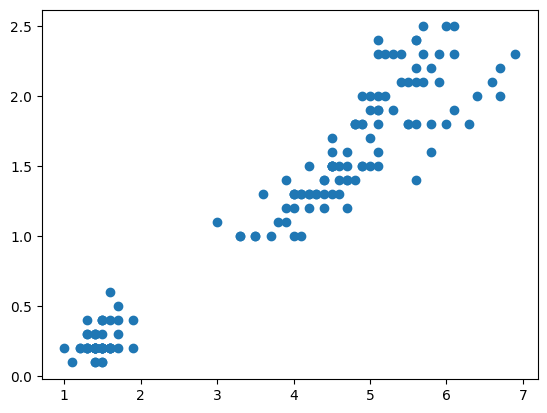

In [ ]:
plt.scatter(df["petal length (cm)"],df["petal width (cm)"])

In [20]:
model=KMeans(n_clusters=3)
y_predict=model.fit_predict(df_o[["length"]],df_o[["width"]])
model.inertia_

24.862898039215697

In [19]:
df_o["y_predict"]=y_predict
df_o.head()

,length,width,y_predict
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1


In [34]:
k=[]

In [35]:
for i in range(2,20):
    model=KMeans(n_clusters=i)
    model.fit_predict(df_o[["length"]],df_o[["width"]])
    k.append(model.inertia_)
    print(model.inertia_)

67.60373143196674
25.30715828877006
12.577511111111102
8.695215675310902
5.988822727272727
6.702333583489678
3.4685115270350564
2.9526905121022775
2.165200392658595
2.079746445922917
1.6537410759175444
1.3690639589168994
1.3963747412008267
1.3012318563789136
1.2180711697722568
0.9058494152046763
0.7048694083694087
0.7368513708513694


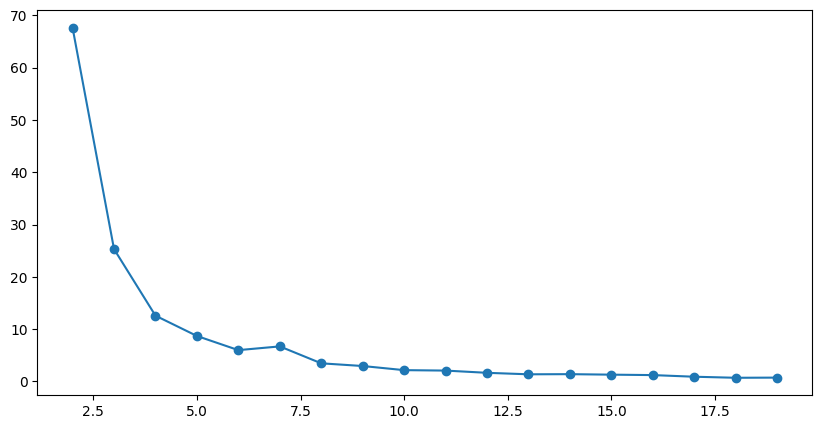

In [65]:
n=range(2,20)
plt.figure(figsize=(10,5))
plt.scatter(n,k)
plt.plot(n,k)

In [43]:
model=KMeans(n_clusters=4)

In [44]:
y_pred=model.fit_predict(df_o[["length"]],df_o[["width"]])

In [45]:
df_o.drop("y_predict",axis="columns",inplace=True)
df_o["predict"]=y_pred

In [59]:
df_o["predict"].unique()

array([1, 3, 2, 0], dtype=int32)

In [60]:
df1=df_o[df_o["predict"]==1]
df0=df_o[df_o["predict"]==0]
df2=df_o[df_o["predict"]==2]
df3=df_o[df_o["predict"]==3]

In [64]:
model.cluster_centers_

array([[5.90333333],
       [1.462     ],
       [3.95517241],
       [4.84878049]])

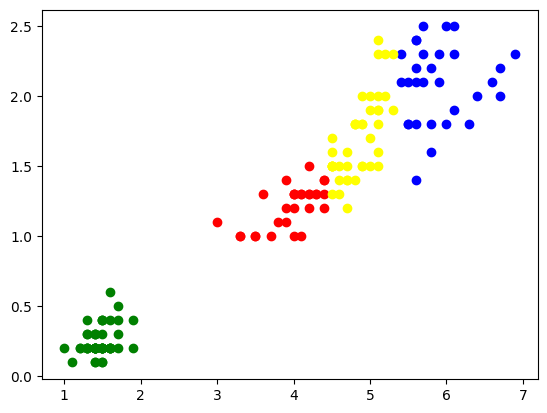

In [ ]:
plt.scatter(df0.length,df0.width,color="blue",label="class_0")
plt.scatter(df1.length,df1.width,color="green",label="class_1")
plt.scatter(df2.length,df2.width,color="red",label="class_2")
plt.scatter(df3.length,df3.width,color="yellow",label="class_3")